# Homework 4 dgupta3@student.gsu.edu 900806428

## Dhruv Gupta

## 1. What is cross-validation? Explain everything in detail about how the cross validation can be performed on given dataset
[10 pts]

Cross validation is a model evaluation method that is better than residuals. The problem with residual evaluations is that they do not give an indication of how well the learner will do when it is asked to make new predictions for data it has not already seen. One way to overcome this problem is to 'not' use the entire data set when training a learner. Some of the data is removed before training begins. <u>Then when training is done, the data that was removed can be used to test the performance of the learned model on new data.</u> This is the basic idea for a whole class of model evaluation methods called cross validation.

__holdout method__ is the simplest kind of cross validation. The data set is separated into two sets, called the training set and the testing set. The function approximator fits a function using the training set only. Then the function approximator is asked to predict the output values for the data in the testing set (it has never seen these output values before). The errors it makes are accumulated as before to give the mean absolute test set error, which is used to evaluate the model. The advantage of this method is that it is usually preferable to the residual method and takes no longer to compute. However, its evaluation can have a high variance. The evaluation may depend heavily on which data points end up in the training set and which end up in the test set, and thus the evaluation may be significantly different depending on how the division is made.

__K-fold cross validation__ is one way to improve over the holdout method. The data set is divided into k subsets, and the holdout method is repeated k times. Each time, one of the k subsets is used as the test set and the other k-1 subsets are put together to form a training set. Then the average error across all k trials is computed. The advantage of this method is that it matters less how the data gets divided. Every data point gets to be in a test set exactly once, and gets to be in a training set k-1 times. The variance of the resulting estimate is reduced as k is increased. The disadvantage of this method is that the training algorithm has to be rerun from scratch k times, which means it takes k times as much computation to make an evaluation. A variant of this method is to randomly divide the data into a test and training set k different times. The advantage of doing this is that you can independently choose how large each test set is and how many trials you average over.

In [128]:
%%html
<img src="k_fold.png", width=900,height=600>

__Leave-one-out__ cross validation is K-fold cross validation taken to its logical extreme, with K equal to N, the number of data points in the set. That means that N separate times, the function approximator is trained on all the data except for one point and a prediction is made for that point. As before the average error is computed and used to evaluate the model. The evaluation given by leave-one-out cross validation error (LOO-XVE) is good, but at first pass it seems very expensive to compute. Fortunately, locally weighted learners can make LOO predictions just as easily as they make regular predictions. That means computing the LOO-XVE takes no more time than computing the residual error and it is a much better way to evaluate models. We will see shortly that Vizier relies heavily on LOO-XVE to choose its metacodes.

## 2. What are advantages and disadvantages of Cross validation? [5 Pts]

__Advatage__

(a) Better prediction results

(b) Avoid overfitting to training data in a linear models like linear regression

(c) Use all data to train and test, this is especially useful for a small dataset when the fewer number of samples may produce a result by chance and may not work on newer samples. By testing in a cross validation methodology the output can be tested thoroughly and not left to chance. 
Eg. If we use cross-validation in this case, we build K different models, so we are able to make predictions on all of our data. For each instance, we make a prediction by a model that didn’t see this example, and so we are getting 100 examples in our test set. For the multi-class problem, we get 10 examples for each class on average, and it’s much better than just 2. After we evaluated our learning algorithm we are now can train our model on all our data because if our 5 models had similar performance using different train sets, we assume that by training it on all the data will get similar performance.

__Disadvantages__

(a) In an ideal world, the cross validation will yield meaningful and accurate results. However, the world is not perfect. You never know what kind of data the model might encounter in the future.

(b) Usually, in predictive modelling, the structure you study evolves over a period. Hence, you can experience differences between the training and validation sets. Considering you have a model that predicts stock values. You have trained the model using data of the previous five years. it may not be realistic to expect accurate predictions over the next five-year period

(c) Here is another example where the limitation of the cross validation process comes to the fore. You develop a model for predicting the individual’s risk of suffering from a particular ailment.

## 3. What is Generalized Additive Models?
[Please refer to our course textbook Elements of Statistical Learning Textbook for this] [5 Pts]

Liklihood based regression models such as the normal linear regression model and the linear log model, assume a  linear form for the the covariate $ X_1, X_2, ... X_p $. When modeling real world scenarios, the linearity assumption may not hold. Generalized Additive methods are methods that may be used to __identify and characterize non-linear regression/covariate effects__.

Generalized Additive Models(GAMs) replace the the linear form $\Sigma\beta_jX_j $ with a a sum of smooth functions $\Sigma s_j(X_j) $

In the regression setting, a generalized additive model has the form:

$
E(Y|X_1 , X_2 , ...,X_p)= \alpha + f_1(X_1)+f_2(X_2)+ ... f_p(X_p)
$

$X_1 , X_2 , ...,X_p $ represent predictors and Y is the outcome;
$f_j$ are non parametric functions. 

each function is fitted using a scatterplot smoother (e.g., a cubic smoothing spline or kernel smoother), and all p functions are simultaneously estimated.

This technique is viewed as an emperical method of maximizing the expected log liklihood or minimizing the Kullback-Leibler distance to the true model. 

## 4. How does Decison Tree Based Method's differ from the rest of the classiffcation methods? [5 Pts]

Decision trees differ from the rest of the classification methods in the way they generate the decision boundaries,  i.e. the lines that are drawn to separate different classes. Decision Trees bisect the space into smaller and smaller regions, whereas Logistic Regression fits a single line to divide the space exactly into two. Of course for higher-dimensional data, these lines would generalize to planes and hyperplanes. A single linear boundary can sometimes be limiting for Logistic Regression. In this example where the two classes are separated by a decidedly non-linear boundary, we see that trees can better capture the division, leading to superior classification performance. However, when classes are not well-separated, trees are susceptible to overfitting the training data, so that Logistic Regression’s simple linear boundary generalizes better.

In [138]:
%%html
<img src="decision_boundary_tree.png"><img src="decision_boundary_log.png">

## 5. What are different classiffcation techniques available and How does a Decision Tress work? [Please write in atleast 5 sentences] [10 pts].

__Different Classification Techniques:__

1) Logic Based
    - Decision Trees
    - Learning Set of Rules
2) Perceptron Based
    - Neural Networks
3) Statistical 
    - Bayesian Networks
    - Instance based learning
        - kNN
4) Support Vector Machines

<hr>

- Logistic Regression
- Naive Bayes

___How decision trees work:___

The decision tree learning algorithm recursively learns the tree as follows:
<ol>

<li> Assign all training instances to the root of the tree. Set curent node to root node.</li>

<li> For each attribute
  <ol>
     <li>Partition all data instances at the node by the value of the attribute.
     <li>Compute the information gain ratio from the partitioning.
  </ol>
<li> Identify feature that results in the greatest information gain ratio. Set this feature to be the splitting criterion at the current node.
    - If the best information gain ratio is 0, tag the current node as a leaf and return.

<li> Partition all instances according to attribute value of the best feature.

<li> Denote each partition as a child node of the current node.

<li> For each child node:
    <ol>
    <li> If the child node is “pure” (has instances from only one class) tag it as a leaf and return. <br>
    <li> If not set the child node as the current node and recurse to step 2.
        </ol
</ol>

## 6. What are some of the advantages and disadvantages of decision trees? [5 pts]

__Advantages__

- Fairly accurate classifier which is small and easy to understand
- Trees	can	find interactions (e.g., sunny	and	humid”)	that linear	classifiers	can’t
- Trees	are	very inexpensive at	test time
    - don’t	always	even	need	to	compute	all	the	features	of	an	example
    
- Decision trees can handle both nominal and numerical attributes.
- Decision trees representation is rich enough to represent any discrete-value classifier.
- Decision trees are capable of handling datasets that may have errors.
- Decision trees are capable of handling datasets that may have missing values.
- Decision trees are considered to be a nonparametric method. This means that decision trees have no assumptions about the space distribution and the classifier structure.

__Disadvantages__

- Most of the algorithms (like ID3 and C4.5) require that the target attribute will have only discrete values.
- As decision trees use the “divide and conquer” method, they tend to perform well if a few highly relevant attributes exist, but less so if many complex interactions are present. One of the reasons for this is that other classifiers can compactly describe a classifier that would be very challenging to represent using a decision tree.
- The greedy characteristic of decision trees leads to oversensitivity to the training set, to irrelevant attributes and to noise.
- Decision tree often involves higher time to train the model.

__Categorical Predictors__
When splitting a predictor having q possible unordered values, there are $2^{q−1} − 1$ possible partitions of the q values into two groups, and the computations become prohibitive for large q. However, with a 0 − 1 outcome, this computation simplifies. We order the predictor classes according to the proportion falling in outcome class 1. Then we split this predictor as if it
were an ordered predictor. One can show this gives the optimal split, in terms of cross-entropy or Gini index, among all possible $2^{q−1} − 1$ splits. This result also holds for a quantitative outcome and square error loss—the categories
are ordered by increasing mean of the outcome. 

For multicategory outcomes, no such simplifications are possible, although various approximations have been proposed (Loh and Vanichsetakul, 1988). The partitioning algorithm tends to favor categorical predictors with many levels q; the number of partitions grows exponentially in q, and the more choices we have, the more likely we can find a good one for the data
at hand. This can lead to severe overfitting if q is large, and such variables should be avoided.

__Loss Matrix__
In classification problems, the consequences of misclassifying observations are more serious in some classes than others. For example, it is probably worse to predict that a person will not have a heart attack when he/she actually will, than vice versa. To account for this, we define a K × K loss matrix L, with $L_{kk′}$ being the loss incurred for classifying a class k observation as class k′. Typically no loss is incurred for correct classifications,that is, $L_{kk}$ = 0 ∀k. To incorporate the losses into the modeling process, we could modify the Gini index to $\Sigma_{k\neq k'} L_{kk'}\hat{p}_{mk}\hat{p}_{mk'}$ 
this would be the expected loss incurred by the randomized rule. This works for the multiclass case, but in the two-class case has no effect, since the coefficient of $\hat{p}_{mk}\hat{p}_{mk'}$ is $L_{kk′} + L_{k'k}$ For two classes a better approach is to weight the observations in class k by $L_{kk′}$. This can be used in the multiclass case only if, as a function of k, $L_{kk′}$ doesn’t depend on k′. Observation weighting can be used with the deviance as well. The effect of observation weighting is to alter the prior probability on the classes. In a terminal node, the empirical Bayes rule implies that we classify to class k(m) = $argmin_k \Sigma_l L_{lk}\hat{p}_{ml}$

__Instability of Trees__
One major problem with trees is their high variance. Often a small change in the data can result in a very different series of splits, making interpretation somewhat precarious. The major reason for this instability is the hierarchical nature of the process: the effect of an error in the top split is propagated down to all of the splits below it. One can alleviate this to
some degree by trying to use a more stable split criterion, but the inherent instability is not removed. It is the price to be paid for estimating a simple, tree-based structure from the data. Bagging (Section 8.7) averages many trees to reduce this variance.

__Lack of Smoothness__
Another limitation of trees is the lack of smoothness of the prediction surface. In classification with 0/1 loss, this doesn’t hurt much, since bias in estimation of the class probabilities has a limited effect. However, this can degrade performance in the regression setting, where we would normally expect the underlying
function to be smooth.

## 7. What are different subset selection based methods and explain the difference between subset selection based method's vs cross validation [Explain with example] [10 Pts]

feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Feature selection techniques are used for several reasons:

- simplification of models to make them easier to interpret by researchers/users
- shorter training times,
- to avoid the curse of dimensionality,
- enhanced generalization by reducing overfitting

Feature selection techniques are often used in domains where there are many features and comparatively few samples (or data points). Archetypal cases for the application of feature selection include the analysis of written texts and DNA microarray data, where there are many thousands of features, and a few tens to hundreds of samples.

With subset selection we retain only a subset of the variables, and eliminate the rest from the model. 

Subset selection evaluates a subset of features as a group for suitability. Subset selection algorithms can be broken up into wrappers, filters, and embedded methods. Wrappers use a search algorithm to search through the space of possible features and evaluate each subset by running a model on the subset. Wrappers can be computationally expensive and have a risk of over fitting to the model. Filters are similar to wrappers in the search approach, but instead of evaluating against a model, a simpler filter is evaluated. Embedded techniques are embedded in, and specific to, a model.

There are a number of different strategies for choosing the subset: 

<ol>
    <li> Best-Subset Selection</li>
        - Best subset regression finds for each k ∈ {0, 1, 2, . . . , p} the subset of size k
that gives smallest residual sum of squares
    
<li> Forward- and Backward-Stepwise Selection </li>

- Rather than search through all possible subsets (which becomes infeasible for p much larger than 40), we can seek a good path through them. Forwardstepwise selection starts with the intercept, and then sequentially adds into the model the predictor that most improves the fit. With many candidate predictors, this might seem like a lot of computation; however, clever updating algorithms can exploit the QR decomposition for the current fit to rapidly establish the next candidate.
        
- Backward-stepwise selection starts with the full model, and sequentially deletes the predictor that has the least impact on the fit. The candidate for dropping is the variable with the smallest Z-score . Backward selection can only be used when N > p, while forward stepwise can always be used.
   
<li>Forward-Stagewise Regression</li>

- Forward-stagewise regression (FS) is even more constrained than forwardstepwise regression. It starts like forward-stepwise regression, with an intercept equal to $\bar{y}$, and centered predictors with coefficients initially all 0. At each step the algorithm identifies the variable most correlated with the current residual. It then computes the simple linear regression coefficient of the residual on this chosen variable, and then adds it to the current coefficient for that variable. This is continued till none of the variables have correlation with the residuals—i.e. the least-squares fit when N > p.
  
<li>Simulated Annealing</li>
  
  
  </ul>
  
  
 As opposed to cross validation which aims at calculating the error based on choosing different collections of records and tests the performance of the model using the different parts of the dataset for training and testing. 

__Example__

working on the music dataset, subset selection would be used to decide which features to include in the analysis and cross validation would be used to apply a model consisting of those features with varying input training and testing data to calculate what portion of the dataset is best for the training and testing activities. 

Working on an example of prostate cancer data. cross-validation works by dividing the training data randomly into ten equal parts. The learning method is fit—for a range of values of the complexity parameter—to nine-tenths of the data, and the prediction error is computed on the remaining one-tenth. This is done in turn for each one-tenth of the data, and the ten prediction error estimates are averaged. From this we obtain an estimated prediction error curve as a function of the complexity parameter. Note that we have already divided these data into a training set of size 67 and a test set of size 30. Cross-validation is applied to the training set, since selecting the shrinkage parameter is part of the training process. 
The test set is there to judge the performance of the selected model. The estimated prediction error curves are shown in Figure below. Many of the curves are very flat over large ranges near their minimum. Included are estimated standard error bands for each estimated error rate, based on the ten error estimates computed by cross-validation. 

We have used the “one-standard-error” rule—we pick the most parsimonious model within one standard error of the minimum (Section 7.10, page 244). Such a rule acknowledges the fact that the tradeoff curve is estimated with error, and hence takes a conservative approach. Best-subset selection chose to use the two predictors lcvol and lweight. The last two lines of the table give the average prediction error (and its estimated standard error) over the test set.

In [142]:
%%html
<img src="subset-cross.png" >

Estimated prediction error curves and their standard errors for the various selection and shrinkage methods. Each curve is plotted as a function of the corresponding complexity parameter for that method. The horizontal axis has been chosen so that the model complexity increases as we move from left to right. The estimates of prediction error and their standard errors were obtained by tenfold cross-validation; The least complex model within one standard error of the best is chosen, indicated by the purple vertical broken lines.

## 8. Please Perform Logistic Classiffcation on the Give dataset (insurance-data.csv) below.[10 Points]

10 Points for Logistic Regression accuracy and output plots.

# Logistic Regression

In [133]:
import pandas as pd
import numpy as np
import pandas_profiling
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [134]:
df = pd.read_csv('../Assignment 4/insurance_data.csv')

In [135]:
df.describe()

age  bought_insurance
count  27.000000         27.000000
mean   39.666667          0.518519
std    15.745573          0.509175
min    18.000000          0.000000
25%    25.000000          0.000000
50%    45.000000          1.000000
75%    54.500000          1.000000
max    62.000000          1.000000

In [85]:
# pandas_profiling.ProfileReport(df)

In [86]:
df.head()

age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
age                 27 non-null int64
bought_insurance    27 non-null int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [132]:
# Data Wrangling

df.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

In [131]:
h = df['age'].plot.hist()
h.size = (20 ,20)

In [89]:
x = list(df['age'])
y = list(df['bought_insurance'])

X = np.reshape(x, (-1, 1))
Y = np.reshape(y, (-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state= 1)

X_train.shape

(18, 1)

In [90]:
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

In [91]:
model = lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

C:\Users\Dhruv-PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
print ("Score: ", model.score(X_test, y_test))

Score:  0.8888888888888888


In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.80      1.00      0.89         4

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



In [94]:
# import numpy as np

plt.scatter( X_train, y_train, label='Training')
plt.scatter( X_test, y_test, color = 'red', label='Test - Actuals')
plt.scatter( X_test, predictions, color = 'orange', label='Test - Predicted')
plt.axhline(y=0, color='k', linestyle='-')
plt.axhline(y=1, color='k', linestyle='-')
plt.axhline(y=0.5, color='b', linestyle='--')

z = np.arange(df['age'].min(), df['age'].max(),0.5)
Z = np.reshape(z, (-1, 1))

predictions_2 = model.predict_proba(Z)[:,1]
plt.plot(z, predictions_2, color='red', linewidth=3)

plt.xlabel("Age")
plt.ylabel("Probability")

plt.legend( bbox_to_anchor=(1,1))
plt.show()


Discussion



## Question 9: Decision Trees

In [95]:
data = pd.read_csv('../Assignment 4/data.csv')

In [96]:
data.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0        0.0102         0.833       204600   0.434          0.021900    2   
1        0.1990         0.743       326933   0.359          0.006110    1   
2        0.0344         0.838       185707   0.412          0.000234    2   
3        0.6040         0.494       199413   0.338          0.510000    5   
4        0.1800         0.678       392893   0.561          0.512000    5   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1650    -8.795     1       0.4310  150.062               4    0.286   
1    0.1370   -10.401     1       0.0794  160.083               4    0.588   
2    0.1590    -7.148     1       0.2890   75.044               4    0.173   
3    0.0922   -15.236     1       0.0261   86.468               4    0.230   
4    0.4390   -11.648     0       0.0694  174.004               4    0.904   

       song_title            artist  target  
0        Mask Off            Future       1  
1         Redbone  Childish Gambino       1  
2    Xanny Family            Future       1  
3  Master Of None       Beach House       1  
4  Parallel Lines       Junior Boys       1

In [97]:
data.describe()

acousticness  danceability   duration_ms       energy  \
count   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean       0.187590      0.618422  2.463062e+05     0.681577   
std        0.259989      0.161029  8.198181e+04     0.210273   
min        0.000003      0.122000  1.604200e+04     0.014800   
25%        0.009630      0.514000  2.000150e+05     0.563000   
50%        0.063300      0.631000  2.292610e+05     0.715000   
75%        0.265000      0.738000  2.703330e+05     0.846000   
max        0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.487347   
min            0.000000     0.000000     0.018800   -33.097000     0.000000   
25%            0.000000     2.000000     0.092300    -8.394000     0.000000   
50%            0.000076     6.000000     0.127000    -6.248000     1.000000   
75%            0.054000     9.000000     0.247000    -4.746000     1.000000   
max            0.976000    11.000000     0.969000    -0.307000     1.000000   

       speechiness        tempo  time_signature      valence       target  
count  2017.000000  2017.000000     2017.000000  2017.000000  2017.000000  
mean      0.092664   121.603272        3.968270     0.496815     0.505702  
std       0.089931    26.685604        0.255853     0.247195     0.500091  
min       0.023100    47.859000        1.000000     0.034800     0.000000  
25%       0.037500   100.189000        4.000000     0.295000     0.000000  
50%       0.054900   121.427000        4.000000     0.492000     1.000000  
75%       0.108000   137.849000        4.000000     0.691000     1.000000  
max       0.816000   219.331000        5.000000     0.992000     1.000000

duration_ms: The duration of the track in milliseconds.

key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. 
E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature looks like this: Acousticness distribution

danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. The distribution of values for this feature looks like this: Danceability distribution

energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. The distribution of values for this feature looks like this: Energy distribution

instrumentalness : Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater the likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The distribution of values for this feature looks like this: Instrumentalness distribution

liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live. The distribution of values for this feature looks like this: Liveness distribution

loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 dB.

speechiness : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 

valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). The distribution of values for this feature looks like this: Valence distribution tempo float The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration.

tempo: The overall estimated tempo of the section in beats per minute (BPM). In musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration. 

key : The estimated overall key of the section. The values in this field ranging from 0 to 11 mapping to pitches using standard Pitch Class notation (E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on). If no key was detected, the value is -1.

mode: integer Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. This field will contain a 0 for “minor”, a 1 for “major”, or a -1 for no result. Note that the major key (e.g. C major) could more likely be confused with the minor key at 3 semitones lower (e.g. A minor) as both keys carry the same pitches.

mode_confidence: The confidence, from 0.0 to 1.0, of the reliability of the mode.

time_signature : An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of “3/4”, to “7/4”.

In [98]:
data.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
song_title          0
artist              0
target              0
dtype: int64

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null int64
valence             2017 non-null float64
song_title          2017 non-null object
artist              2017 non-null object
target              2017 non-null int64
dtypes: float64(9), int64(5), object(2)
memory usage: 252.2+ KB


In [100]:
data.nunique()

acousticness        1394
danceability         632
duration_ms         1921
energy               719
instrumentalness    1107
key                   12
liveness             793
loudness            1808
mode                   2
speechiness          792
tempo               1919
time_signature         4
valence              853
song_title          1956
artist              1343
target                 2
dtype: int64

### No missing data. 

In [101]:
# Label Encoder: Change Text Variables to Numerical 

LE = LabelEncoder()

data['artist'] = LE.fit_transform(data['artist'])
data.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0        0.0102         0.833       204600   0.434          0.021900    2   
1        0.1990         0.743       326933   0.359          0.006110    1   
2        0.0344         0.838       185707   0.412          0.000234    2   
3        0.6040         0.494       199413   0.338          0.510000    5   
4        0.1800         0.678       392893   0.561          0.512000    5   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1650    -8.795     1       0.4310  150.062               4    0.286   
1    0.1370   -10.401     1       0.0794  160.083               4    0.588   
2    0.1590    -7.148     1       0.2890   75.044               4    0.173   
3    0.0922   -15.236     1       0.0261   86.468               4    0.230   
4    0.4390   -11.648     0       0.0694  174.004               4    0.904   

       song_title  artist  target  
0        Mask Off     449       1  
1         Redbone     222       1  
2    Xanny Family     449       1  
3  Master Of None      95       1  
4  Parallel Lines     628       1

In [102]:
data.drop('song_title', axis=1, inplace=True)
data.drop('time_signature', axis=1, inplace=True) #Almost all values are same


data.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0        0.0102         0.833       204600   0.434          0.021900    2   
1        0.1990         0.743       326933   0.359          0.006110    1   
2        0.0344         0.838       185707   0.412          0.000234    2   
3        0.6040         0.494       199413   0.338          0.510000    5   
4        0.1800         0.678       392893   0.561          0.512000    5   

   liveness  loudness  mode  speechiness    tempo  valence  artist  target  
0    0.1650    -8.795     1       0.4310  150.062    0.286     449       1  
1    0.1370   -10.401     1       0.0794  160.083    0.588     222       1  
2    0.1590    -7.148     1       0.2890   75.044    0.173     449       1  
3    0.0922   -15.236     1       0.0261   86.468    0.230      95       1  
4    0.4390   -11.648     0       0.0694  174.004    0.904     628       1

In [103]:
# Inital Scaling for data evaluation 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

data_2  = data.copy()

x = list(data['duration_ms'])
x = np.reshape(x, (-1, 1))
x = sc.fit_transform(x)
data_2['duration_ms'] = x


x = list(data['tempo'])
x = np.reshape(x, (-1, 1))
x = sc.fit_transform(x)
data_2['tempo'] = x

x = list(data['loudness'])
x = np.reshape(x, (-1, 1))
x = sc.fit_transform(x)
data_2['loudness'] = x

x = list(data['artist'])
x = np.reshape(x, (-1, 1))
x = sc.fit_transform(x)
data_2['artist'] = x


# data_2.drop('target', axis=1, inplace=True)
data_2.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0        0.0102         0.833    -0.508851   0.434          0.021900    2   
1        0.1990         0.743     0.983716   0.359          0.006110    1   
2        0.0344         0.838    -0.739362   0.412          0.000234    2   
3        0.6040         0.494    -0.572137   0.338          0.510000    5   
4        0.1800         0.678     1.788484   0.561          0.512000    5   

   liveness  loudness  mode  speechiness     tempo  valence    artist  target  
0    0.1650 -0.454530     1       0.4310  1.066709    0.286 -0.557699       1  
1    0.1370 -0.881573     1       0.0794  1.442323    0.588 -1.141591       1  
2    0.1590 -0.016586     1       0.2890 -1.745166    0.173 -0.557699       1  
3    0.0922 -2.167220     1       0.0261 -1.316964    0.230 -1.468262       1  
4    0.4390 -1.213155     0       0.0694  1.964120    0.904 -0.097273       1

([<matplotlib.axis.XTick at 0x23aea1d8b48>,
 <a list of 14 Text xticklabel objects>)

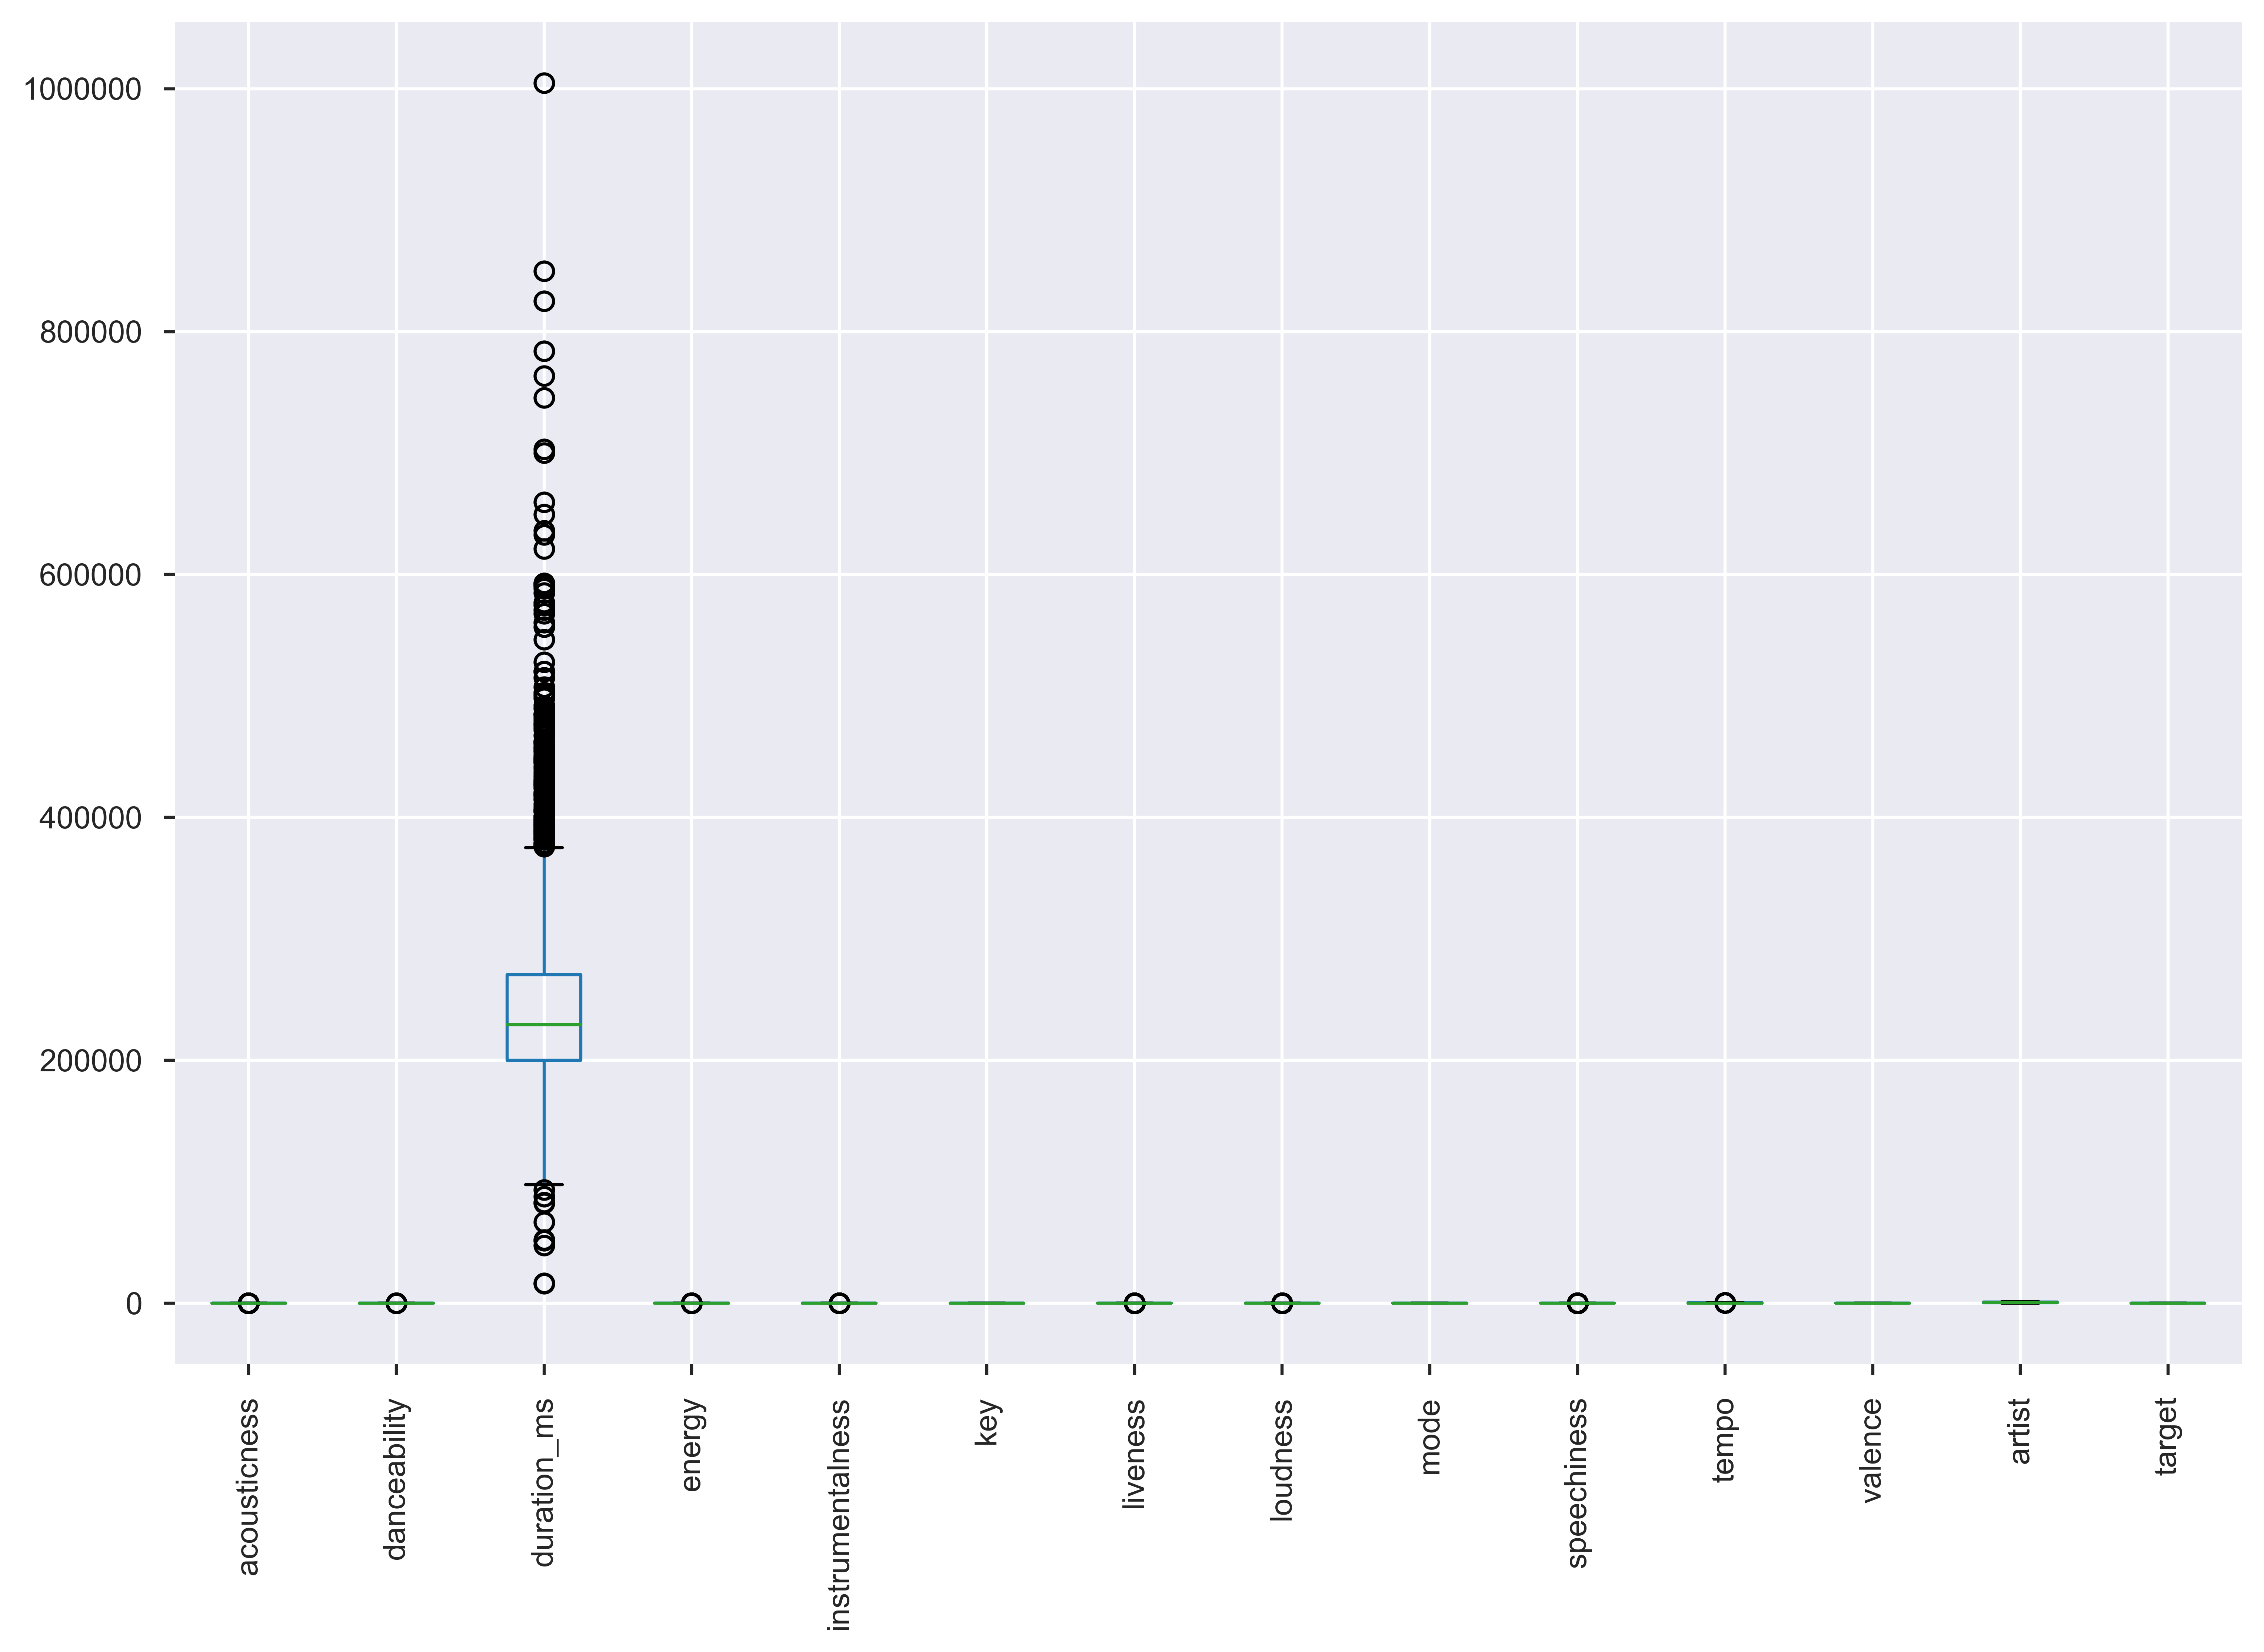

In [104]:
data.plot.box(figsize=(12,8))
plt.xticks(
    list(range(1, len(data.columns)+1)), 
    data.columns,
    rotation='vertical')

([<matplotlib.axis.XTick at 0x23af28da3c8>,
 <a list of 14 Text xticklabel objects>)

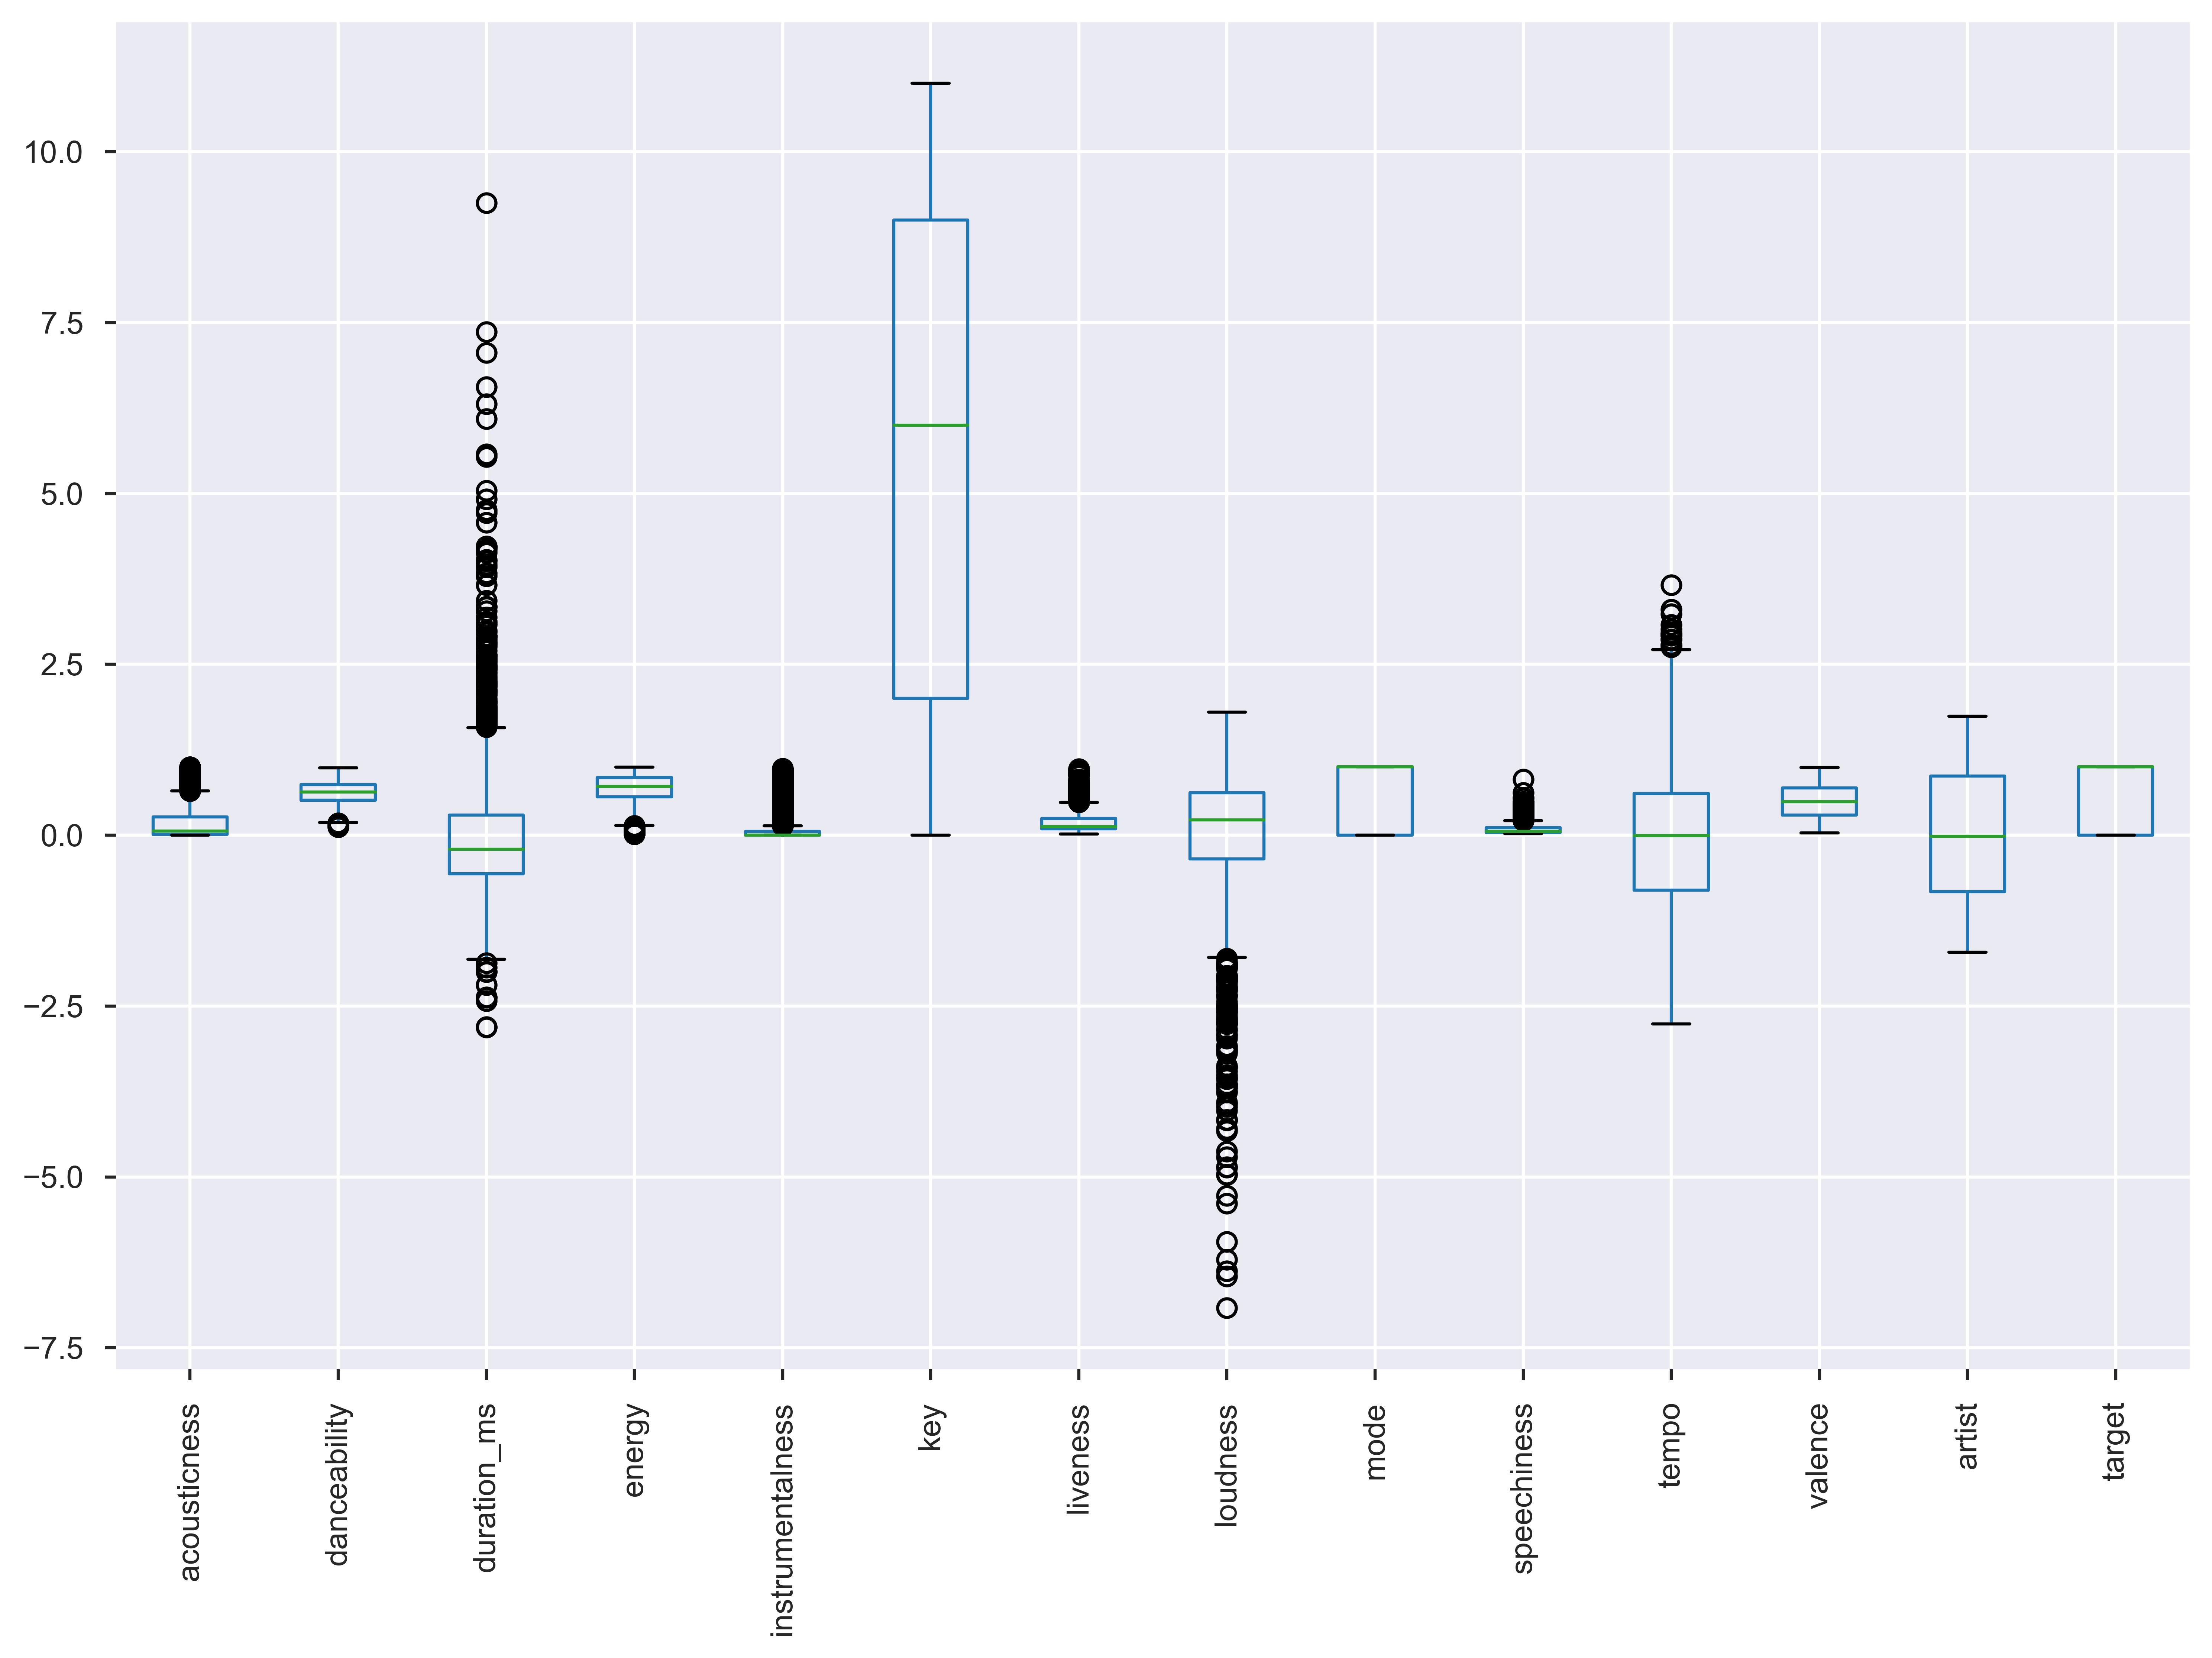

In [105]:
data_2.plot.box(figsize=(12,8))
plt.xticks(
    list(range(1, len(data_2.columns)+1)), 
    data_2.columns,
    rotation='vertical')

In [106]:
data_2.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'artist', 'target'],
      dtype='object')

In [107]:
# Pick out features which have high 

data_2.corr()

acousticness  danceability  duration_ms    energy  \
acousticness          1.000000     -0.179894     0.071536 -0.646319   
danceability         -0.179894      1.000000     0.004695  0.038557   
duration_ms           0.071536      0.004695     1.000000 -0.144473   
energy               -0.646319      0.038557    -0.144473  1.000000   
instrumentalness      0.144397     -0.130561     0.305403 -0.122890   
key                  -0.081037      0.022325     0.023570  0.072886   
liveness             -0.117126     -0.132044     0.023203  0.217435   
loudness             -0.562021      0.104362    -0.273798  0.762177   
mode                  0.068028     -0.047867    -0.074806 -0.070263   
speechiness          -0.099893      0.142661    -0.079562  0.093102   
tempo                -0.127596     -0.143538    -0.076469  0.165721   
valence              -0.152227      0.442061    -0.120030  0.278383   
artist                0.045293     -0.024656    -0.033310 -0.001480   
target               -0.129627      0.176706     0.146749  0.039688   

                  instrumentalness       key  liveness  loudness      mode  \
acousticness              0.144397 -0.081037 -0.117126 -0.562021  0.068028   
danceability             -0.130561  0.022325 -0.132044  0.104362 -0.047867   
duration_ms               0.305403  0.023570  0.023203 -0.273798 -0.074806   
energy                   -0.122890  0.072886  0.217435  0.762177 -0.070263   
instrumentalness          1.000000 -0.009640  0.001063 -0.354625 -0.030099   
key                      -0.009640  1.000000  0.049739  0.050929 -0.195040   
liveness                  0.001063  0.049739  1.000000  0.156648 -0.018587   
loudness                 -0.354625  0.050929  0.156648  1.000000 -0.044015   
mode                     -0.030099 -0.195040 -0.018587 -0.044015  1.000000   
speechiness              -0.155349  0.019116  0.092403  0.088844 -0.049398   
tempo                     0.000347  0.040301  0.010558  0.156418 -0.059995   
valence                  -0.194630  0.032485 -0.053011  0.204968 -0.032879   
artist                   -0.004818  0.001029  0.003210  0.015527  0.016031   
target                    0.152594  0.033594  0.026364 -0.072000 -0.072336   

                  speechiness     tempo   valence    artist    target  
acousticness        -0.099893 -0.127596 -0.152227  0.045293 -0.129627  
danceability         0.142661 -0.143538  0.442061 -0.024656  0.176706  
duration_ms         -0.079562 -0.076469 -0.120030 -0.033310  0.146749  
energy               0.093102  0.165721  0.278383 -0.001480  0.039688  
instrumentalness    -0.155349  0.000347 -0.194630 -0.004818  0.152594  
key                  0.019116  0.040301  0.032485  0.001029  0.033594  
liveness             0.092403  0.010558 -0.053011  0.003210  0.026364  
loudness             0.088844  0.156418  0.204968  0.015527 -0.072000  
mode                -0.049398 -0.059995 -0.032879  0.016031 -0.072336  
speechiness          1.000000  0.111359  0.054419 -0.014412  0.154006  
tempo                0.111359  1.000000 -0.014965  0.015956  0.034732  
valence              0.054419 -0.014965  1.000000  0.023900  0.107930  
artist              -0.014412  0.015956  0.023900  1.000000 -0.014588  
target               0.154006  0.034732  0.107930 -0.014588  1.000000

Features Dropped: 
- Song name: Almost every track name is unique and therefore will not add any IG
- Artist Name: Same as above
- mode: All are 4



Features chosen:
features = ["danceability", "loudness", "valence", "energy", "instrumentalness", "acousticness", "key", "speechiness",
           "duration_ms", "liveness"]

## Decision Tree Implementation

In [108]:
X = data.values[:, 1:-2]
Y = data.values[:,-1]

In [109]:
X_train, X_test, y_train, y_test = train_test_split( 
          X, Y, test_size = 0.3, random_state = 0)

In [110]:
# Standardization
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

y_train = np.reshape(y_train, (-1, 1))
y_train = sc.fit_transform(y_train)
y_train = np.reshape(y_train, (-1, 1))
# y_test = sc.fit_transform(y_test)

In [111]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
import graphviz
from scipy import misc
import io
import pydotplus
import matplotlib.image as mpimg

In [112]:
c = DecisionTreeClassifier(min_samples_split = 100)
# The minimum value to split value to split the samples is used as 100, based on the data size. 
# If the minimum split value is a less value the dense decision tree will be generated.


features = ["danceability", "loudness", "valence", "energy", "instrumentalness", "acousticness", "key", "speechiness",
           "duration_ms", "liveness"]

train, test = train_test_split(data, test_size = 0.30)

Xtrain = train[features]
Ytrain = train["target"]

xtest = test[features]
ytest = test["target"]

In [113]:
dt = c.fit(Xtrain, Ytrain)

In [136]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'

import matplotlib as mpl

def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names = features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = mpimg.imread(path)
    imgplot = plt.imshow(img)
#     plt.show()

In [137]:
# plt.rcParams['figure.dpi']= 600
# plt.rcParams['figure.figsize']= (40, 40)

show_tree(dt, features, 'dec_tree_01.png')

In [116]:
y_pred = c.predict(xtest)

In [117]:
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(ytest, y_pred))

Accuracy:  0.7079207920792079


In [125]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71       296
           1       0.72      0.69      0.71       310

    accuracy                           0.71       606
   macro avg       0.71      0.71      0.71       606
weighted avg       0.71      0.71      0.71       606



## Decision Tree w/ cross validation

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from pprint import pprint
scalar = StandardScaler()

In [119]:
c = DecisionTreeClassifier(min_samples_split = 100)
# The minimum value to split value to split the samples is used as 100, based on the data size. 
# If the minimum split value is a less value the dense decision tree will be generated.


features = ["danceability", "loudness", "valence", "energy", "instrumentalness", "acousticness", "key", "speechiness",
           "duration_ms", "liveness"]

x = data[features]
y = data["target"]

In [120]:
depth = []
d_scores = []
for i in range(3,30):
    c = DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation
    pipeline = Pipeline([('transformer', scalar), ('estimator', c)])
    scores = cross_val_score(pipeline, X=x, y=y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
    d_scores.append((i,scores))
pprint(depth)

[(3, 0.6837512204786267),
 (4, 0.6990664032231735),
 (5, 0.6901085099271655),
 (6, 0.6861969441052366),
 (7, 0.6697762378504726),
 (8, 0.6678110627321231),
 (9, 0.6767396461214806),
 (10, 0.6692767374764348),
 (11, 0.665818102707367),
 (12, 0.6544162380399313),
 (13, 0.6687977618115635),
 (14, 0.6688063675972541),
 (15, 0.6643626663960659),
 (16, 0.660368547227595),
 (17, 0.658379318968142),
 (18, 0.6464865118692144),
 (19, 0.6613761298397887),
 (20, 0.6633189562290722),
 (21, 0.6673285825568869),
 (22, 0.6618515053080056),
 (23, 0.6544092529407746),
 (24, 0.6643213658012225),
 (25, 0.6608680595624189),
 (26, 0.6653461719455835),
 (27, 0.6583809874978207),
 (28, 0.6683068791840027),
 (29, 0.6489236775532786)]


### Accuracy of each step w/ different tree height:

In [121]:
for ea in d_scores:
    print("height = ", ea[0]," -> \n", ea[1], '\n')

height =  3  -> 
 [0.70934256 0.76470588 0.51903114 0.6875     0.67013889 0.73867596
 0.69686411] 

height =  4  -> 
 [0.73356401 0.74740484 0.63321799 0.6875     0.65972222 0.728223
 0.70383275] 

height =  5  -> 
 [0.76124567 0.73010381 0.64013841 0.68055556 0.62847222 0.71777003
 0.67247387] 

height =  6  -> 
 [0.75432526 0.71626298 0.56055363 0.72916667 0.63888889 0.71428571
 0.68989547] 

height =  7  -> 
 [0.73010381 0.71972318 0.6366782  0.62152778 0.625      0.70383275
 0.65156794] 

height =  8  -> 
 [0.73010381 0.71280277 0.62629758 0.61458333 0.61458333 0.71428571
 0.66202091] 

height =  9  -> 
 [0.72318339 0.69896194 0.65051903 0.63541667 0.64930556 0.70034843
 0.67944251] 

height =  10  -> 
 [0.73010381 0.71280277 0.64013841 0.61805556 0.63888889 0.70034843
 0.6445993 ] 

height =  11  -> 
 [0.71280277 0.67820069 0.62283737 0.69444444 0.64930556 0.68292683
 0.62020906] 

height =  12  -> 
 [0.71280277 0.67474048 0.61245675 0.62152778 0.65625    0.69337979
 0.6097561 ] 


### From the above results, the best average of the 7 fold validation is at tree height of 5

#### Test for different values of k in k-fold

In [123]:
k_fold_summary = []
for i in range(3,15):
    c = DecisionTreeClassifier(max_depth=5)
    # Perform 7-fold cross validation 
    pipeline = Pipeline([('transformer', scalar), ('estimator', c)])
    scores = cross_val_score(pipeline, X=x, y=y, cv=i, n_jobs=4)
    k_fold_summary.append((i,scores.mean()))
#     d_scores.append((i,scores))
pprint(k_fold_summary)

[(3, 0.6782117502771291),
 (4, 0.6950789721829326),
 (5, 0.6772166670761368),
 (6, 0.6781931491686685),
 (7, 0.6811765057529467),
 (8, 0.6980287957899252),
 (9, 0.6906234726077776),
 (10, 0.669819220728043),
 (11, 0.7045163199831768),
 (12, 0.6608170141823989),
 (13, 0.7015737777524378),
 (14, 0.7010083307497101)]


### k = 4, results in accuracy which is very close to larger values of k, however due to the larger computation requirement, k= 4 will be preffered. 